#Import Libraries

In [ ]:
#Google Drive Connection
from google.colab import drive

#Data
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Math
import math

#Google Drive Connection

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read Data

In [ ]:
path = '/content/drive/MyDrive/Portfolio by Colab/Insurance/Customer Behavior/health_insurance_dataset.csv'
data = pd.read_csv(path)
data.drop(['Customer_ID'], axis=1, inplace=True)
# data.drop(['Policy_Term'], axis=1, inplace=True)
data['TotalPremiumAmount'] = data['Premium_Amount'] * data['Policy_Term']
data['YearOfStartProfit'] = np.ceil(data['Total_Claim_Amount'] / data['Premium_Amount']).apply(lambda x: x + 1 if x == 0 else x).astype('int')
data['P&L'] = data['TotalPremiumAmount'] - data['Total_Claim_Amount']

data

,Age,Gender,Marital_Status,Occupation,Education_Level,Income,Policy_Coverage_Amount,Premium_Amount,Policy_Term,Number_of_Claims,Total_Claim_Amount,Payment_Timeliness,Customer_Service_Interaction,Website_Engagement,Customer_Satisfaction_Rating,TotalPremiumAmount,YearOfStartProfit,P&L
0,62,Female,Divorced,Unemployed,Bachelor,199758,39987,346.5,21,2,2452,Delayed,8,32,1,7276.5,8,4824.5
1,65,Female,Divorced,Student,Other,167164,9872,669.0,4,0,0,Delayed,1,34,1,2676.0,1,2676.0
2,71,Male,Single,Employed,Master,77809,19472,162.0,8,1,3098,Timely,3,14,4,1296.0,20,-1802.0
3,18,Female,Widowed,Self-Employed,Bachelor,111644,42549,349.5,18,3,27720,Timely,8,20,1,6291.0,80,-21429.0
4,21,Female,Married,Retired,Master,110637,23020,555.0,21,1,9946,Timely,3,92,2,11655.0,18,1709.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,47,Other,Single,Retired,High School,122837,26773,966.0,30,3,7416,Delayed,2,13,4,28980.0,8,21564.0
99996,48,Female,Married,Retired,Bachelor,54934,28665,550.5,2,4,13276,Delayed,0,98,5,1101.0,25,-12175.0
99997,20,Other,Married,Student,High School,168059,36772,199.5,3,2,13084,Timely,3,46,4,598.5,66,-12485.5
99998,23,Other,Divorced,Employed,Bachelor,198693,29638,423.0,28,4,17720,Delayed,6,1,1,11844.0,42,-5876.0


#Exploration Data Analysis (EDA)

##Descriptive Statistic

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           100000 non-null  int64  
 1   Gender                        100000 non-null  object 
 2   Marital_Status                100000 non-null  object 
 3   Occupation                    100000 non-null  object 
 4   Education_Level               100000 non-null  object 
 5   Income                        100000 non-null  int64  
 6   Policy_Coverage_Amount        100000 non-null  int64  
 7   Premium_Amount                100000 non-null  float64
 8   Policy_Term                   100000 non-null  int64  
 9   Number_of_Claims              100000 non-null  int64  
 10  Total_Claim_Amount            100000 non-null  int64  
 11  Payment_Timeliness            100000 non-null  object 
 12  Customer_Service_Interaction  100000 non-null

In [ ]:
data.describe()

,Age,Income,Policy_Coverage_Amount,Premium_Amount,Policy_Term,Number_of_Claims,Total_Claim_Amount,Customer_Service_Interaction,Website_Engagement,Customer_Satisfaction_Rating,TotalPremiumAmount,YearOfStartProfit,P&L
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,48.56339,109977.870000,27483.189770,825.060510,15.562150,2.002930,10132.729230,4.499430,49.482280,2.996270,12850.716510,17.908320,2717.987280
std,17.86632,52105.230118,12987.853435,389.635955,8.647332,1.411532,10025.918516,2.868728,28.861906,1.411643,9964.853638,24.646746,14147.411088
min,18.00000,20002.000000,5000.000000,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,150.000000,1.000000,-39733.000000
25%,33.00000,64527.500000,16253.000000,487.500000,8.000000,1.000000,1409.000000,2.000000,24.000000,2.000000,4695.000000,2.000000,-5865.500000
50%,49.00000,110274.000000,27421.000000,826.500000,16.000000,2.000000,7303.500000,5.000000,49.000000,3.000000,10279.500000,10.000000,2728.000000
75%,64.00000,155209.000000,38723.000000,1164.000000,23.000000,3.000000,16359.000000,7.000000,74.000000,4.000000,19066.500000,23.000000,11502.250000
max,79.00000,199998.000000,49999.000000,1498.500000,30.000000,4.000000,39992.000000,9.000000,99.000000,5.000000,44955.000000,259.000000,44955.000000


##Visualization

###General

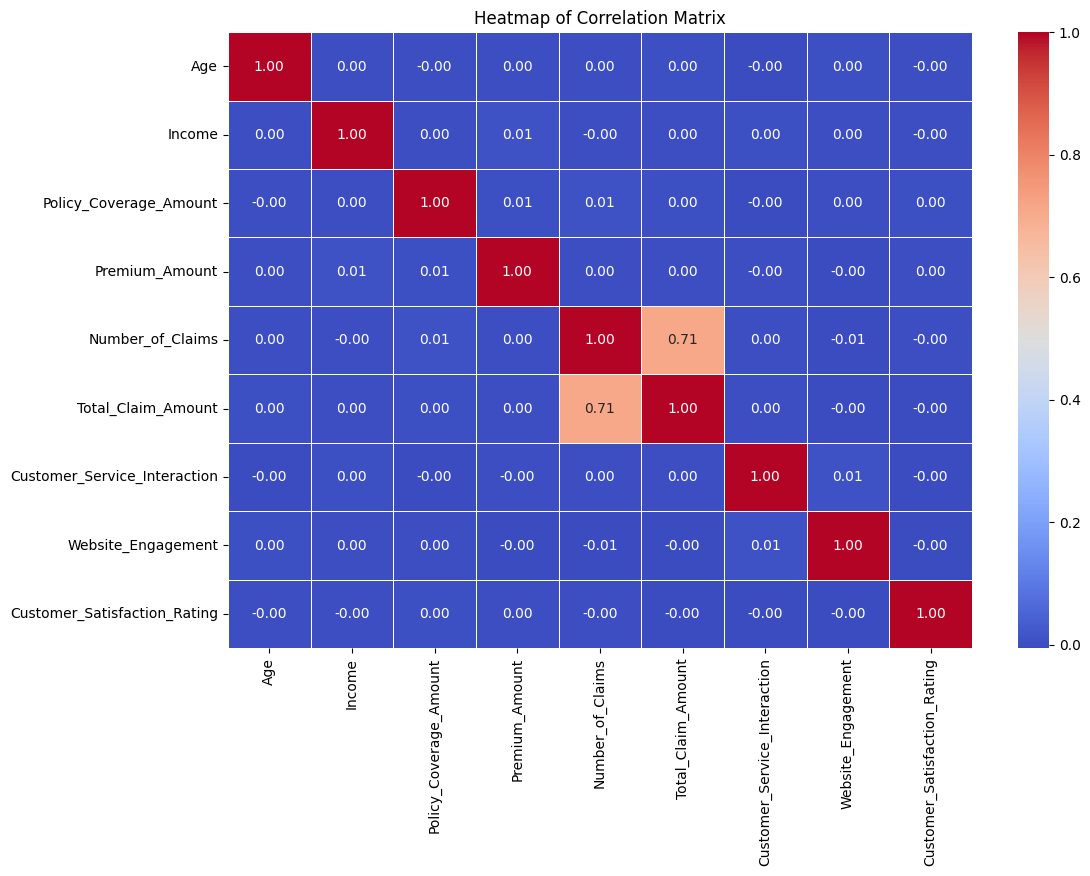

In [ ]:
Num_Cols = ['Age', 'Income', 'Policy_Coverage_Amount',
                    'Premium_Amount', 'Number_of_Claims', 'Total_Claim_Amount',
                    'Customer_Service_Interaction', 'Website_Engagement', 'Customer_Satisfaction_Rating']

# Calculating the correlation matrix
corr_matrix = data[Num_Cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

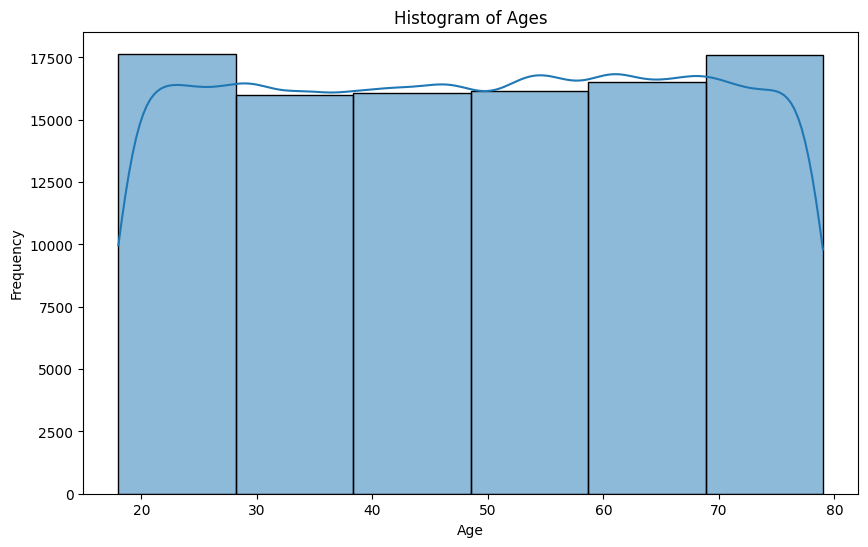

In [ ]:
#Age
# Plotting a histogram for the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=6, kde=True)
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

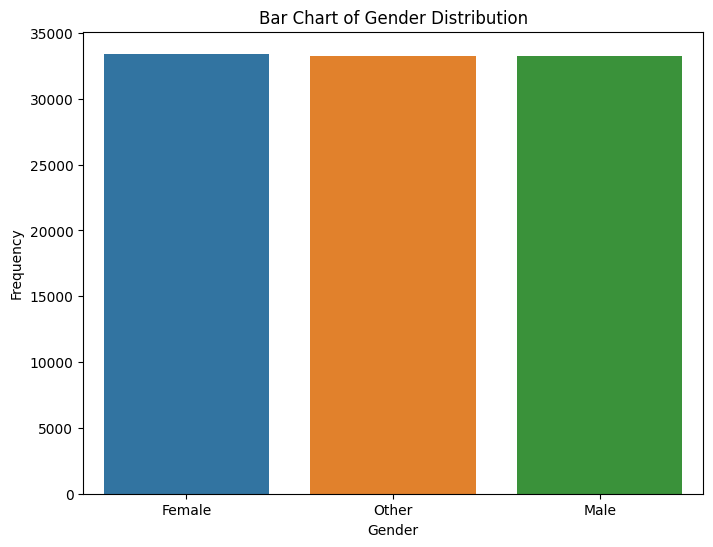

In [ ]:
#Gender
# Plotting a bar chart for the 'Gender' column
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Bar Chart of Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

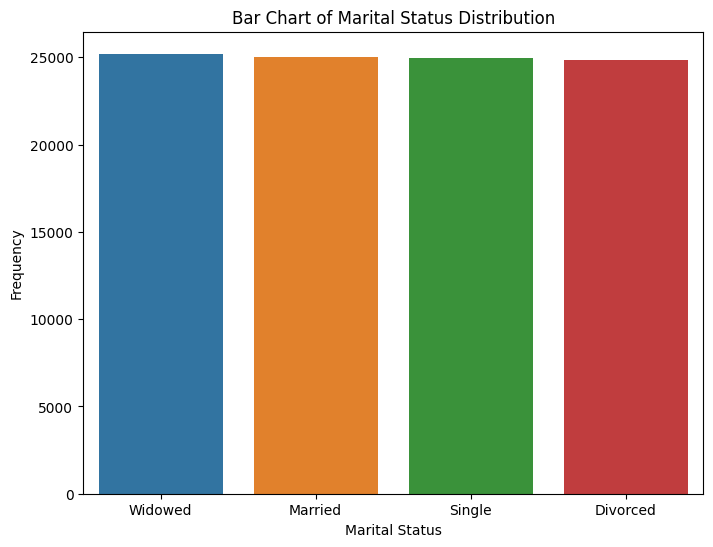

In [ ]:
#Marital Status
# Plotting a bar chart for the 'Marital Status' column
gender_counts = data['Marital_Status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Bar Chart of Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

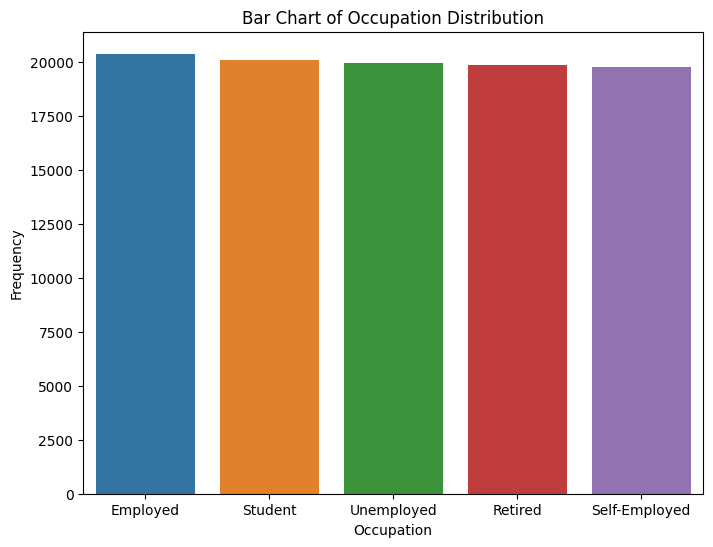

In [ ]:
#Occupation
# Plotting a bar chart for the 'Occupation' column
gender_counts = data['Occupation'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Bar Chart of Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.show()

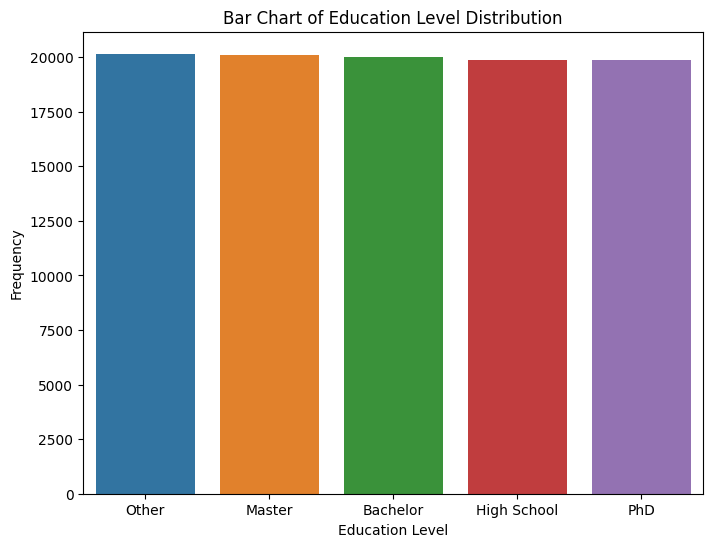

In [ ]:
#Education
# Plotting a bar chart for the 'Education' column
gender_counts = data['Education_Level'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Bar Chart of Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

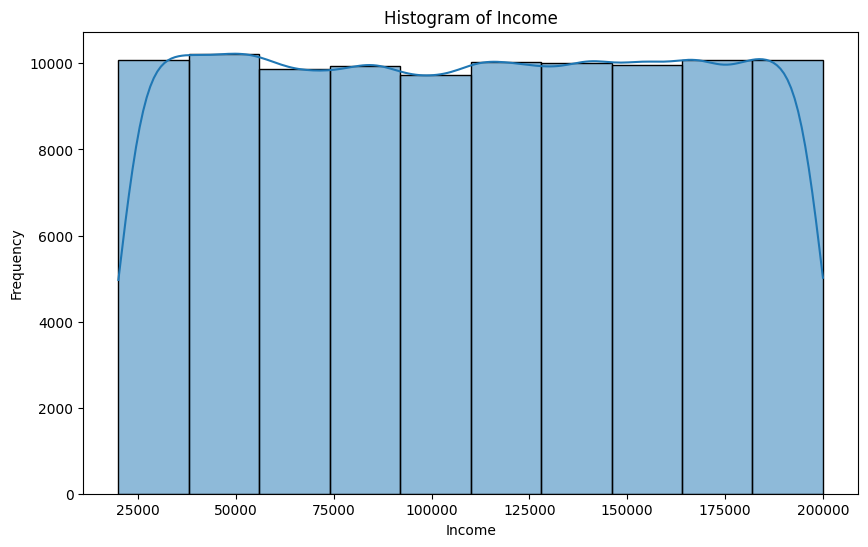

In [ ]:
#Income
# Plotting a histogram for the 'Income' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], bins=10, kde=True)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

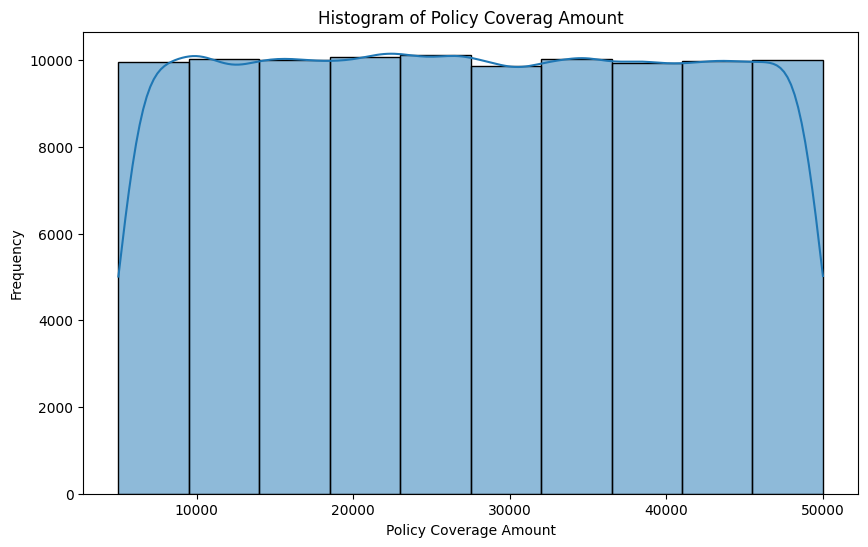

In [ ]:
#Policy Coverage Amount
# Plotting a histogram for the 'Policy Coverage Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Policy_Coverage_Amount'], bins=10, kde=True)
plt.title('Histogram of Policy Coverag Amount')
plt.xlabel('Policy Coverage Amount')
plt.ylabel('Frequency')
plt.show()

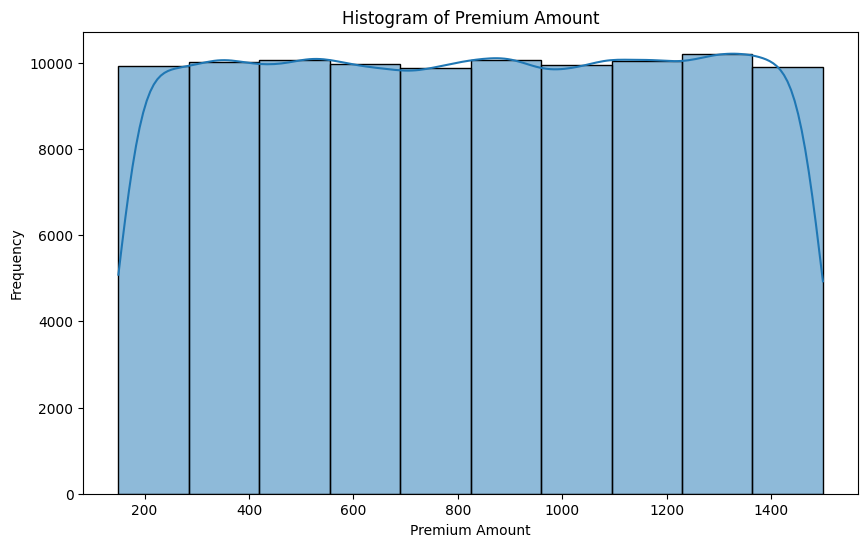

In [ ]:
#Premium Amount
# Plotting a histogram for the 'Premium Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Premium_Amount'], bins=10, kde=True)
plt.title('Histogram of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.show()

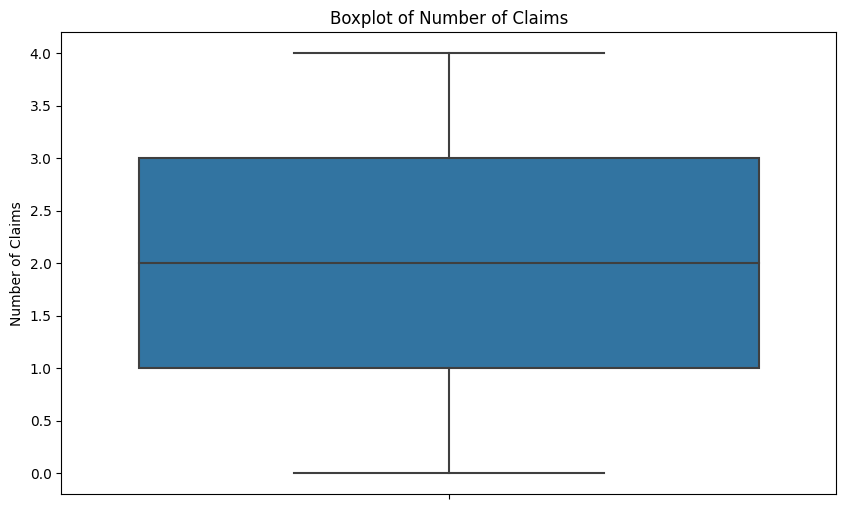

In [ ]:
#Number of Claims
# Plotting a boxplot for the 'Number_of_Claims' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Number_of_Claims'])
plt.title('Boxplot of Number of Claims')
plt.ylabel('Number of Claims')
plt.show()

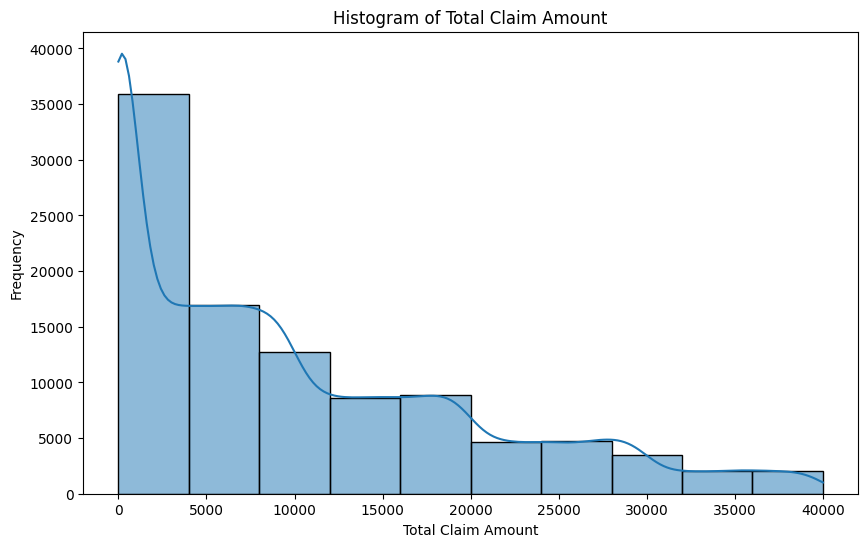

In [ ]:
#Total Claim Amount
# Plotting a histogram for the 'Total Claim Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Claim_Amount'], bins=10, kde=True)
plt.title('Histogram of Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency')
plt.show()

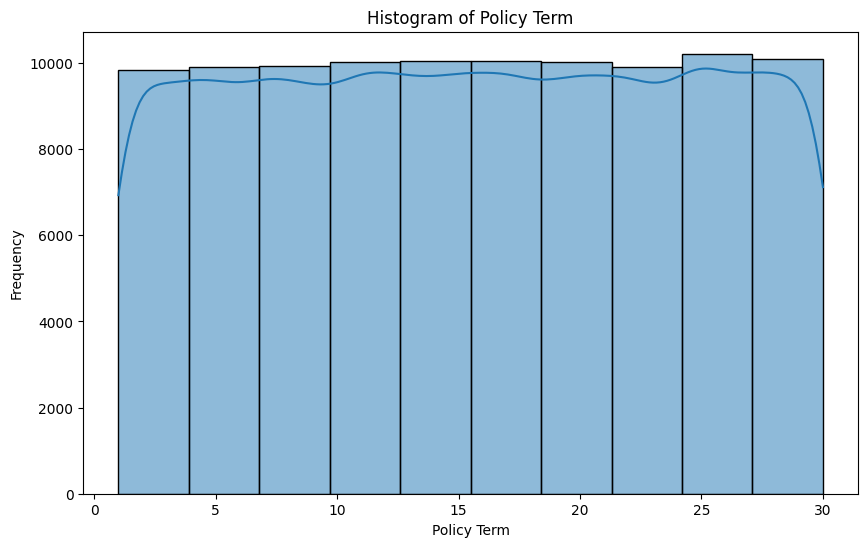

In [ ]:
#Policy Term
# Plotting a histogram for the 'Policy Term' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Policy_Term'], bins=10, kde=True)
plt.title('Histogram of Policy Term')
plt.xlabel('Policy Term')
plt.ylabel('Frequency')
plt.show()

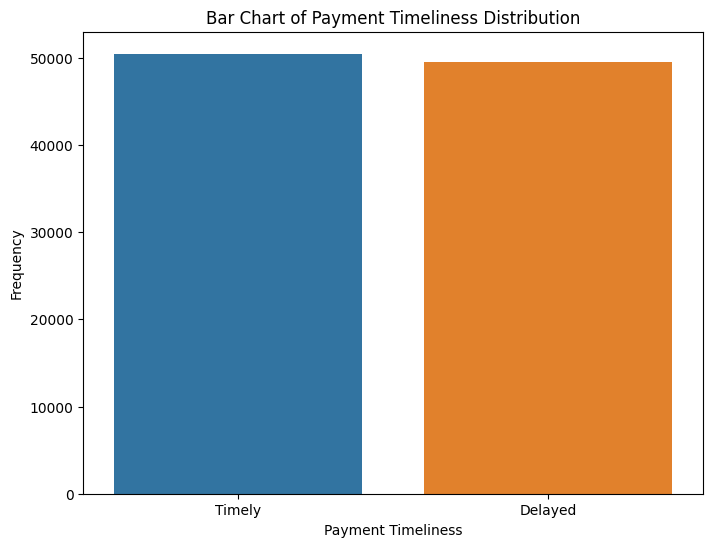

In [ ]:
#Payment Timeliness
# Plotting a bar chart for the Payment Timeliness' column
gender_counts = data['Payment_Timeliness'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Bar Chart of Payment Timeliness Distribution')
plt.xlabel('Payment Timeliness')
plt.ylabel('Frequency')
plt.show()

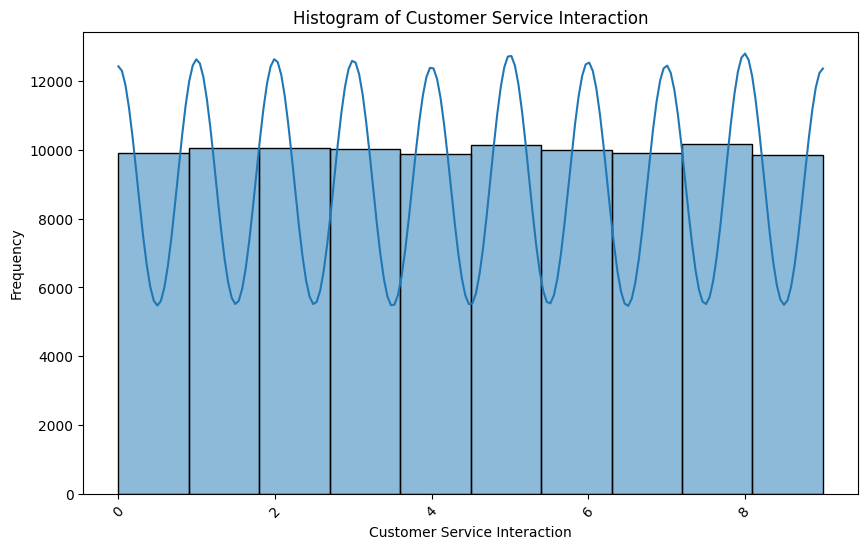

In [ ]:
#Customer Service Interaction
# Creating bins for the 'Total_Claim_Amount' column and plotting the histogram
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Binning the data with the corrected bins and labels
data['Customer_Service_Interaction_Binned'] = pd.cut(data['Customer_Service_Interaction'],
                                                   bins=bins,
                                                   labels=labels,
                                                   include_lowest=True)

# Plotting a histogram for the 'Customer Service Interaction' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer_Service_Interaction'], bins=len(bins)-1, kde=True)
plt.title('Histogram of Customer Service Interaction')
plt.xlabel('Customer Service Interaction')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


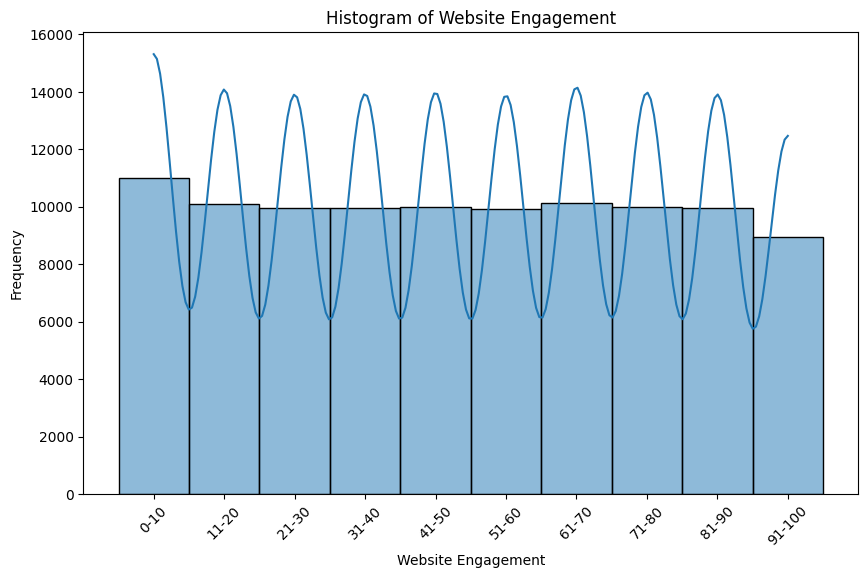

In [ ]:
#Customer Service Interaction
# Creating bins for the 'Website_Engagement' column
website_engagement_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
website_engagement_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Binning the data with the specified bins and labels
data['Website_Engagement_Binned'] = pd.cut(data['Website_Engagement'],
                                         bins=website_engagement_bins,
                                         labels=website_engagement_labels,
                                         include_lowest=True)

# Plotting a histogram for the 'Website_Engagement' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Website_Engagement_Binned'], bins=len(website_engagement_bins)-1, kde=True)
plt.title('Histogram of Website Engagement')
plt.xlabel('Website Engagement')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


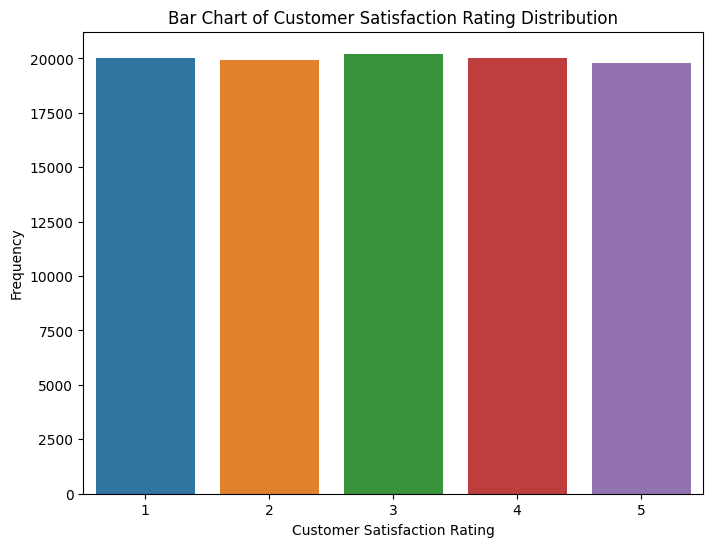

In [ ]:
#Customer Satisfaction Rating
# Counting the occurrences of each customer satisfaction rating
customer_satisfaction_counts = data['Customer_Satisfaction_Rating'].value_counts()

# Plotting a bar chart for the 'Customer Satisfaction Rating'
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_satisfaction_counts.index, y=customer_satisfaction_counts.values)
plt.title('Bar Chart of Customer Satisfaction Rating Distribution')
plt.xlabel('Customer Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()


###Profit (Loss)

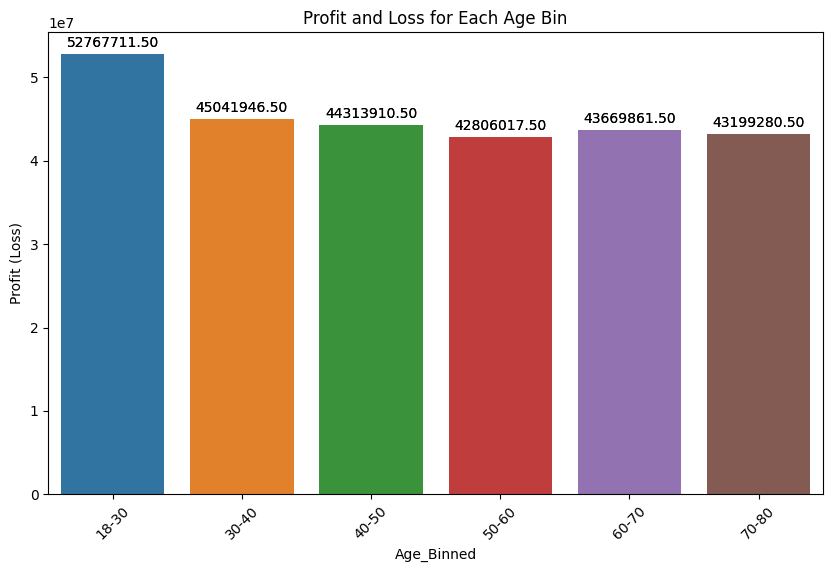

In [ ]:
#Age

# Creating bins for the 'Age' column and plotting the histogram
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# Creating a new column for binned total claim amounts
data['Age_Binned'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Grouping the data by the binned categories and summing the total claim amounts
grouped_data = data.groupby('Age_Binned')['P&L'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('Profit and Loss for Each Age Bin')
plt.xlabel('Age')
plt.ylabel('Profit (Loss)')

# Adding labels to each bar
barplot = sns.barplot(x=grouped_data.index, y=grouped_data.values)
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

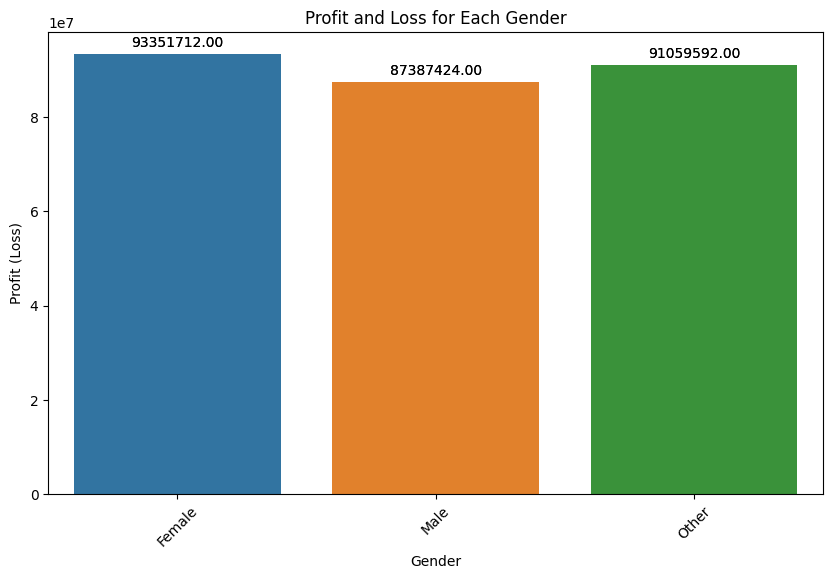

In [ ]:
#Gender

# Grouping the data by the binned categories and summing the total claim amounts
grouped_data = data.groupby('Gender')['P&L'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('Profit and Loss for Each Gender')
plt.xlabel('Gender')
plt.ylabel('Profit (Loss)')

# Adding labels to each bar
barplot = sns.barplot(x=grouped_data.index, y=grouped_data.values)
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

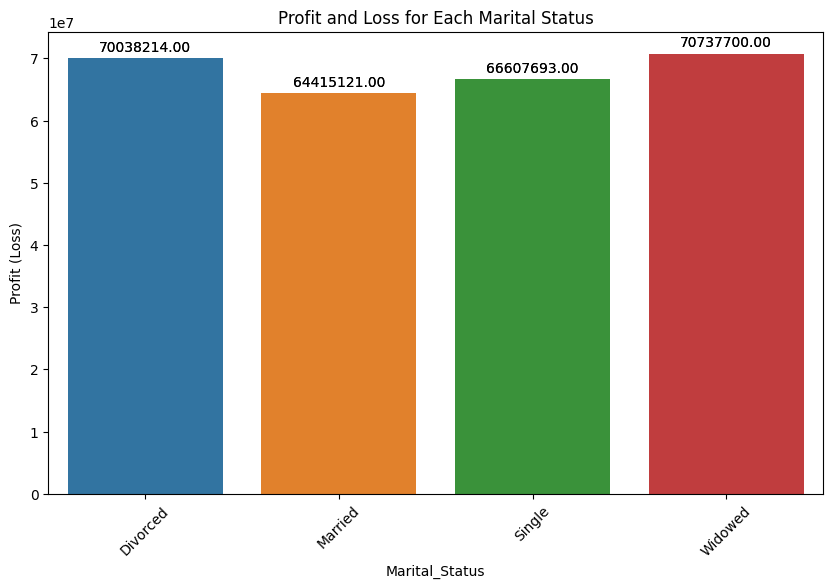

In [ ]:
#Marital Status

# Grouping the data by the binned categories and summing the total claim amounts
grouped_data = data.groupby('Marital_Status')['P&L'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('Profit and Loss for Each Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Profit (Loss)')

# Adding labels to each bar
barplot = sns.barplot(x=grouped_data.index, y=grouped_data.values)
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

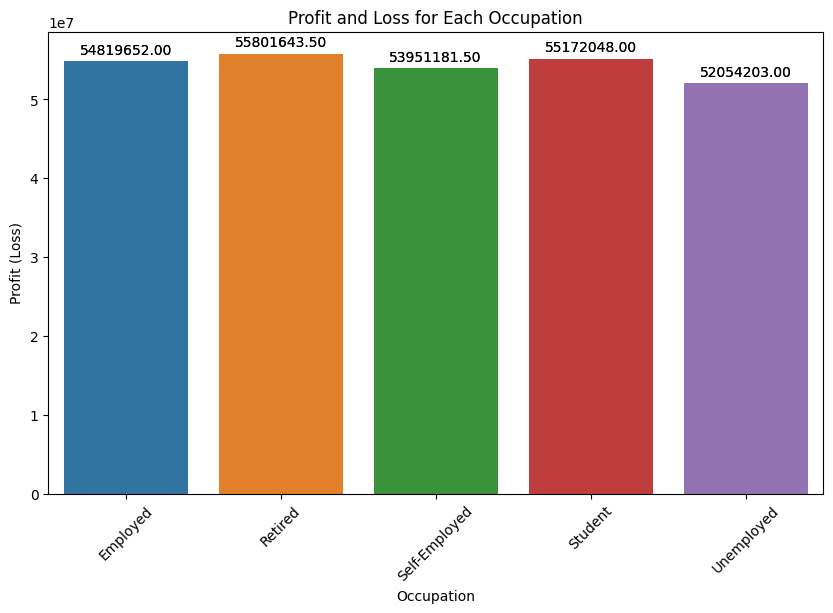

In [ ]:
#Occupation

# Grouping the data by the binned categories and summing the total claim amounts
grouped_data = data.groupby('Occupation')['P&L'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('Profit and Loss for Each Occupation')
plt.xlabel('Occupation')
plt.ylabel('Profit (Loss)')

# Adding labels to each bar
barplot = sns.barplot(x=grouped_data.index, y=grouped_data.values)
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

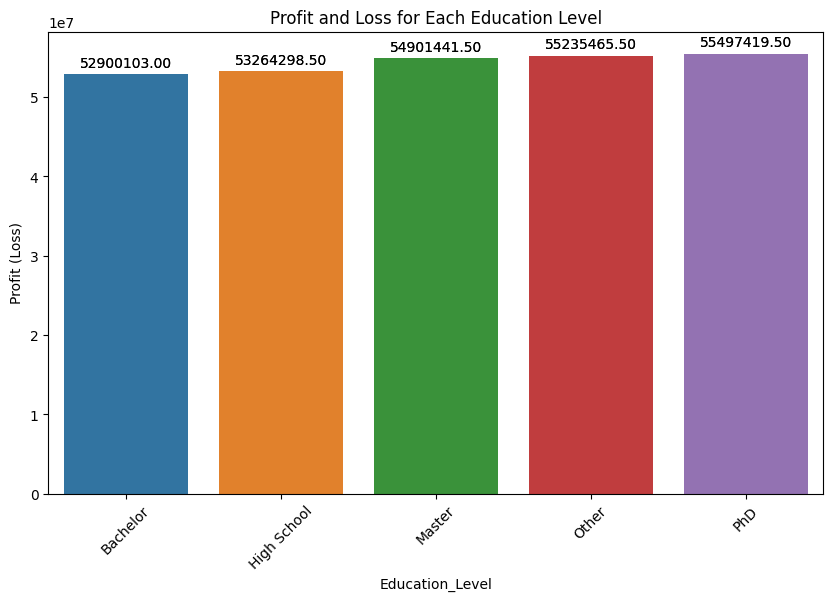

In [ ]:
#Education Level

# Grouping the data by the binned categories and summing the total claim amounts
grouped_data = data.groupby('Education_Level')['P&L'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('Profit and Loss for Each Education Level')
plt.xlabel('Education Level')
plt.ylabel('Profit (Loss)')

# Adding labels to each bar
barplot = sns.barplot(x=grouped_data.index, y=grouped_data.values)
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

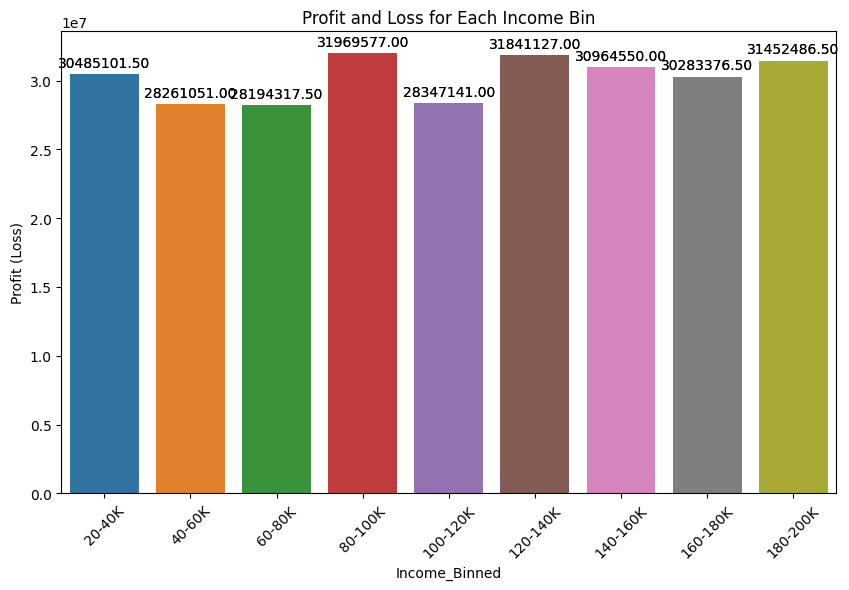

In [ ]:
#Income

# Creating bins for the 'Age' column and plotting the histogram
bins = [20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000]
labels = ['20-40K', '40-60K', '60-80K', '80-100K', '100-120K', '120-140K', '140-160K', '160-180K', '180-200K']

# Creating a new column for binned total claim amounts
data['Income_Binned'] = pd.cut(data['Income'], bins=bins, labels=labels, right=False)

# Grouping the data by the binned categories and summing the total claim amounts
grouped_data = data.groupby('Income_Binned')['P&L'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('Profit and Loss for Each Income Bin')
plt.xlabel('Income')
plt.ylabel('Profit (Loss)')

# Adding labels to each bar
barplot = sns.barplot(x=grouped_data.index, y=grouped_data.values)
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

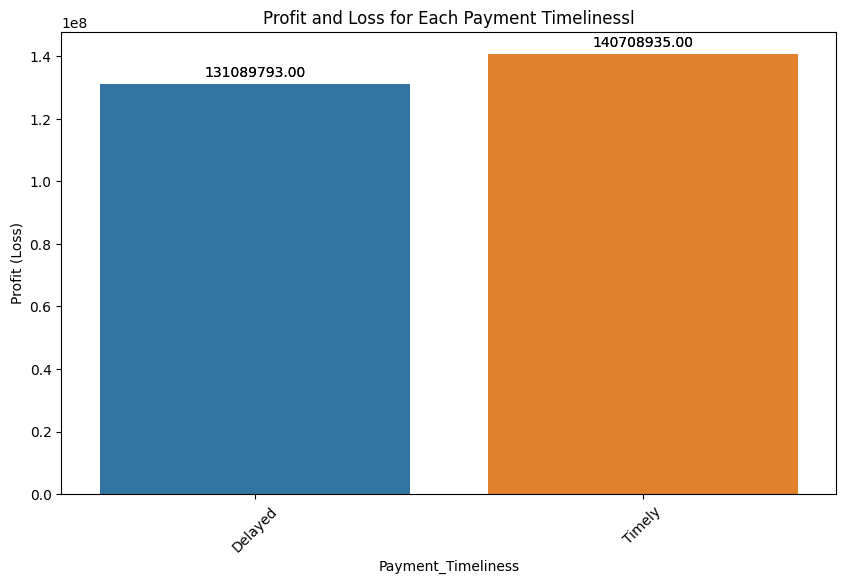

In [ ]:
#Payment Timeliness

# Grouping the data by the binned categories and summing the total claim amounts
grouped_data = data.groupby('Payment_Timeliness')['P&L'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('Profit and Loss for Each Payment Timelinessl')
plt.xlabel('Payment Timeliness')
plt.ylabel('Profit (Loss)')

# Adding labels to each bar
barplot = sns.barplot(x=grouped_data.index, y=grouped_data.values)
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')

plt.xticks(rotation=45)
plt.show()